In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.graphics.tsaplots as st
air_passenger_df=pd.read_csv("AirPassengers.csv")
air_passenger_df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [2]:
air_passenger_df['Month'] = pd.to_datetime(air_passenger_df['Month'], format='%Y-%m')
air_passenger_df= air_passenger_df.set_index('Month')
air_passenger_df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


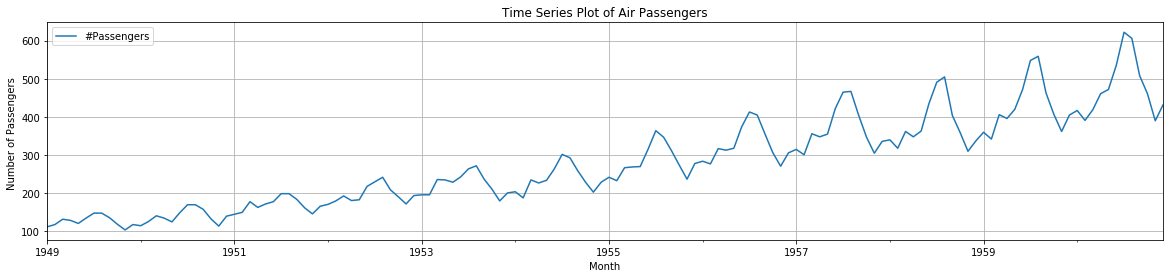

In [3]:
air_passenger_df.plot(figsize=(20,4))
plt.grid()
plt.xlabel('Month')
plt.ylabel('Number of Passengers ')
plt.title('Time Series Plot of Air Passengers')
plt.show()

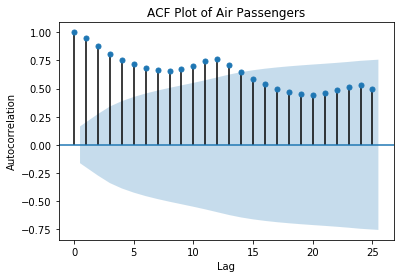

In [4]:
st.plot_acf(air_passenger_df['#Passengers'], lags = 25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Air Passengers')
plt.show()

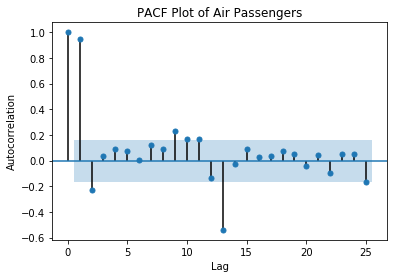

In [5]:
# PACF Plot for air passengers - 25 ywmle
st.plot_pacf(air_passenger_df['#Passengers'], method='ywmle', lags=25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Air Passengers')
plt.show()

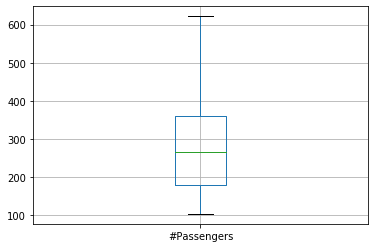

In [6]:
boxplot = air_passenger_df.boxplot(column=['#Passengers'])
boxplot.plot()

plt.show()

In [7]:
air_passenger_df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


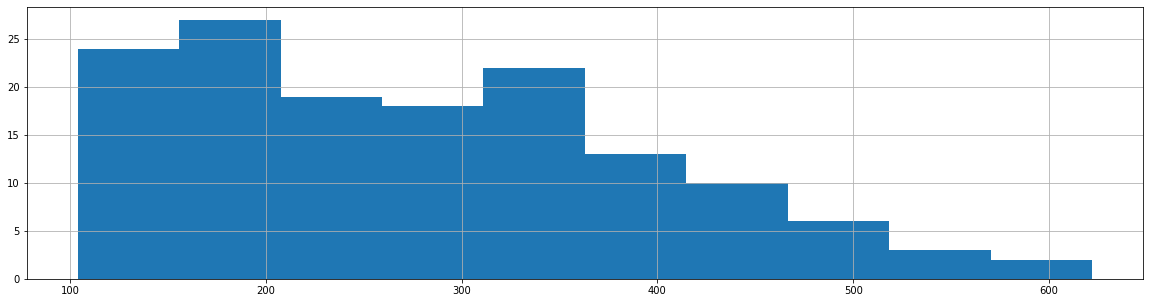

In [8]:
fig = air_passenger_df['#Passengers'].hist(figsize = (20,5))

In [15]:
##MA method

import math

a=len(air_passenger_df)
train_len = math.ceil(0.8*a)
train = air_passenger_df[0:train_len] # first 80% of data months as training set
test = air_passenger_df[train_len:] # last 20% of data
y = air_passenger_df.copy()
ma_window = 12
y['predict'] = air_passenger_df['#Passengers'].rolling(ma_window).mean()   ##calculate the previous mean
y['predict'][train_len:] = y['predict'][train_len-1]  ## +- previous errors' mean

/Users/yiweijiang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


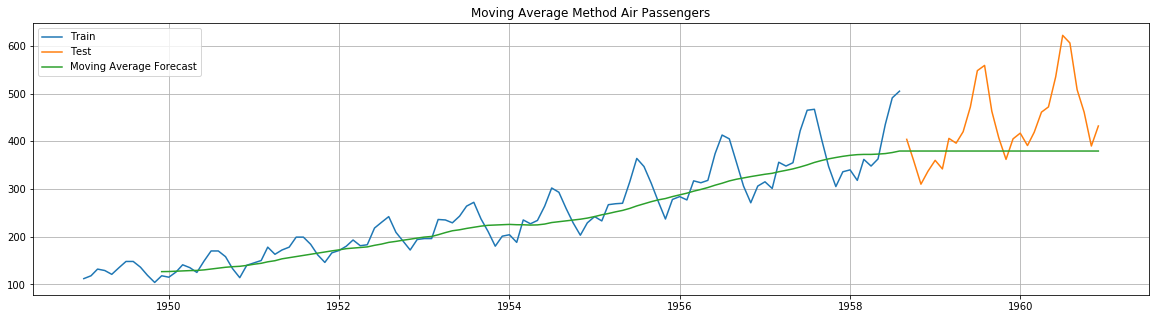

In [16]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['#Passengers'], label='Train')    ##set 80% of data as train and forecast the rest 20% of data
plt.plot(test['#Passengers'], label='Test')
plt.plot(y['predict'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.title('Moving Average Method Air Passengers')
plt.show()

# Electric Production

In [17]:
electric_df = pd.read_csv("Electric_Production.csv",
                 names = ["date", "value"], header = 0, parse_dates = [0])
electric_df['date'] = pd.to_datetime(electric_df['date'],infer_datetime_format=True)
electric_df = electric_df.set_index(['date'])
electric_df

,value
date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


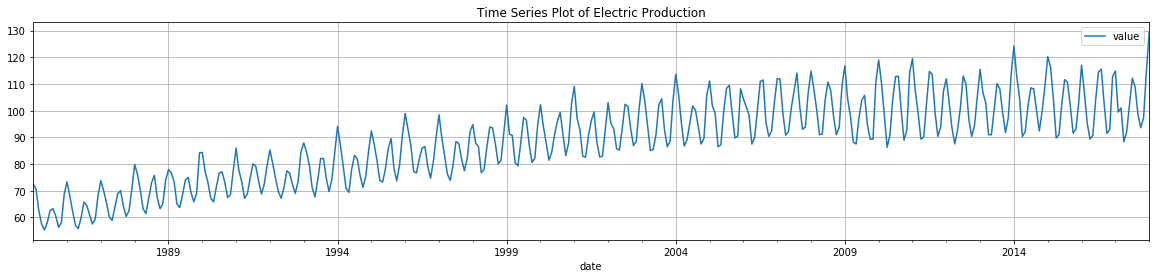

In [19]:
electric_df.plot(figsize=(20,4))
plt.grid()
plt.title('Time Series Plot of Electric Production')
plt.show()

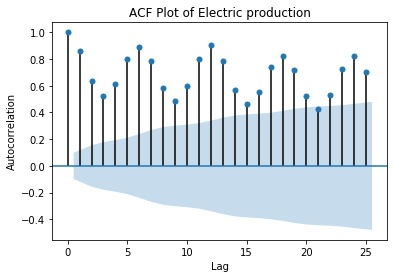

In [20]:
st.plot_acf(electric_df['value'], lags = 25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Electric production')
plt.show()

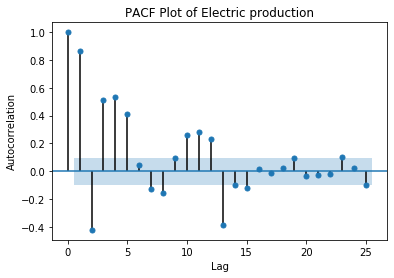

In [21]:
st.plot_pacf(electric_df['value'], method='ywmle', lags=25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Electric production')
plt.show()

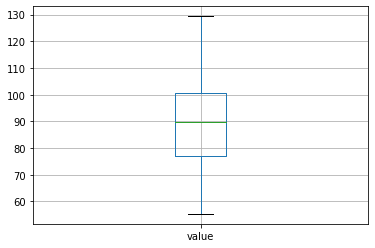

In [22]:
boxplot = electric_df.boxplot(column=['value'])
boxplot.plot()

plt.show()

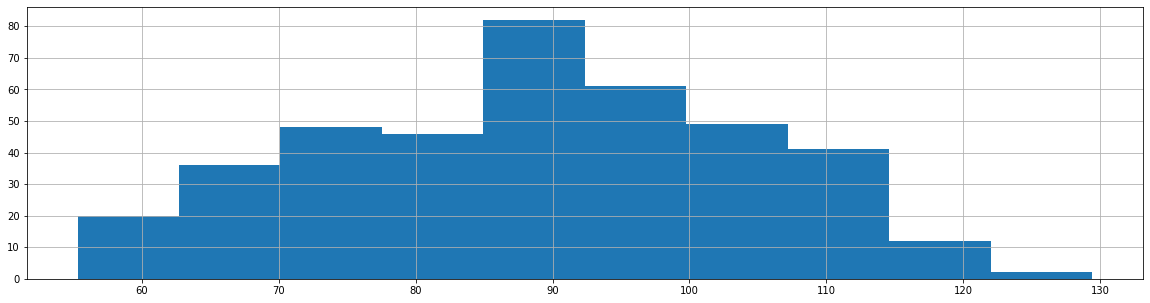

In [23]:
fig = electric_df['value'].hist(figsize = (20,5))

In [25]:
##MA method

import math

a=len(electric_df)
train_len = math.ceil(0.8*a)
train = electric_df[0:train_len] # first 80% of data months as training set
test = electric_df[train_len:] # last 20% of data
y = electric_df.copy()
ma_window = 12
y['predict'] = electric_df['value'].rolling(ma_window).mean()   ##calculate the previous mean
y['predict'][train_len:] = y['predict'][train_len-1]  ## +- previous errors' mean

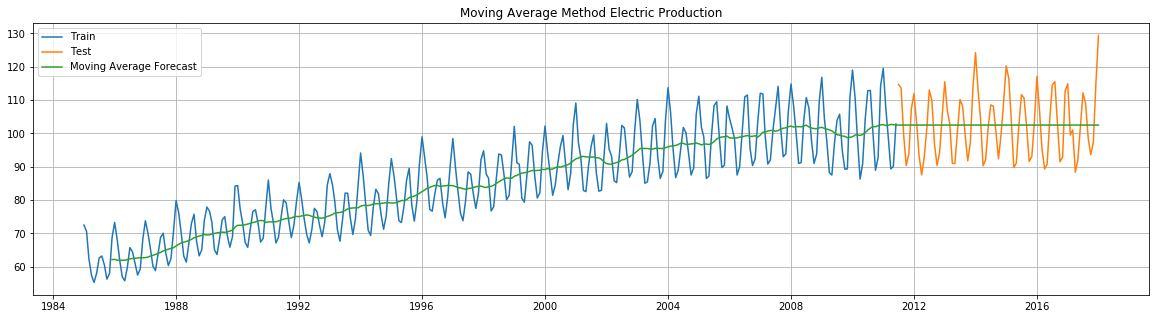

In [26]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['value'], label='Train')    ##set 80% of data as train and forecast the rest 20% of data
plt.plot(test['value'], label='Test')
plt.plot(y['predict'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.title('Moving Average Method Electric Production')
plt.show()

# Bike

In [27]:
bike_df=pd.read_csv("bike_groupby_day.csv")
bike_df

,date,count
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600
...,...,...
451,2012-12-15,5047
452,2012-12-16,3786
453,2012-12-17,4585
454,2012-12-18,5557


In [28]:
bike_df['date'] = pd.to_datetime(bike_df['date'], format='%Y-%m')
bike_df= bike_df.set_index('date')
bike_df.head()

,count
date,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600


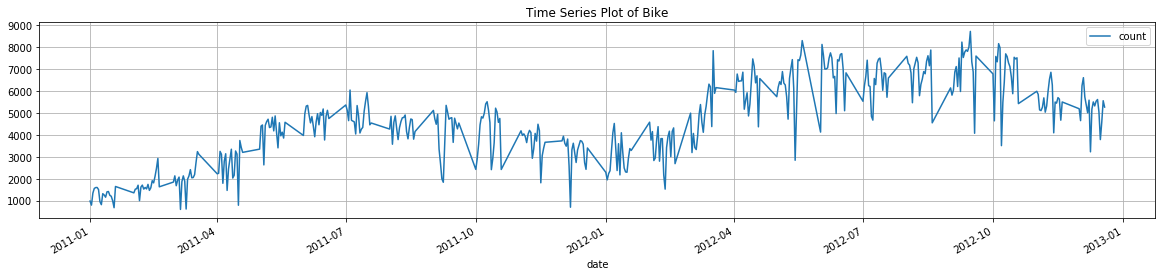

In [29]:
bike_df.plot(figsize=(20,4))
plt.grid()
plt.title('Time Series Plot of Bike')
plt.show()

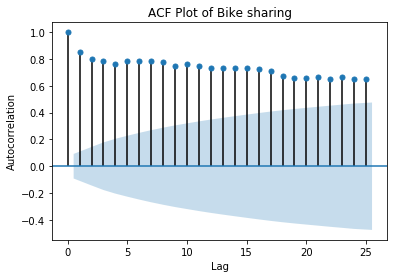

In [31]:
st.plot_acf(bike_df['count'], lags = 25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Bike sharing')
plt.show()

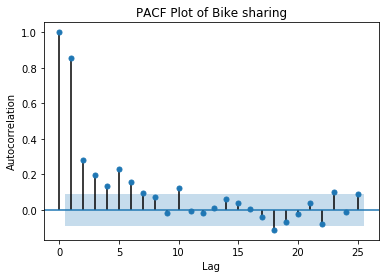

In [32]:
st.plot_pacf(bike_df['count'], method='ywmle', lags=25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of Bike sharing')
plt.show()

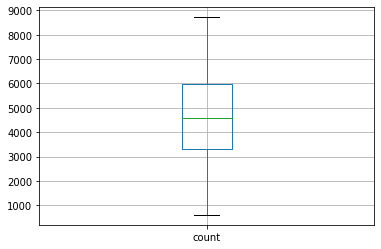

In [34]:
boxplot = bike_df.boxplot(column=['count'])
boxplot.plot()

plt.show()

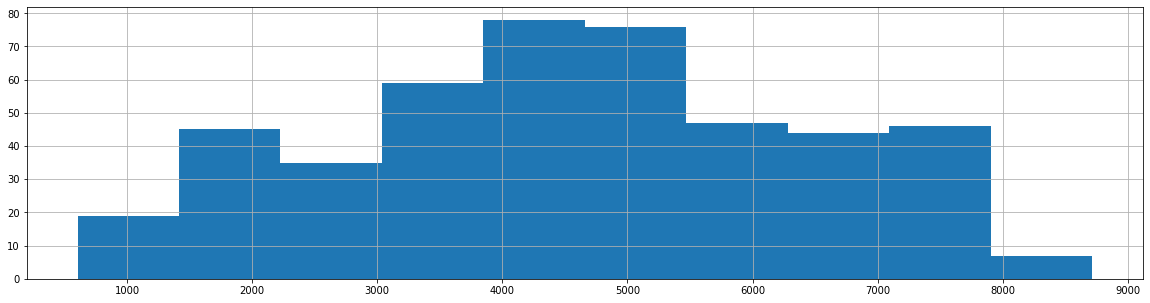

In [35]:
fig = bike_df['count'].hist(figsize = (20,5))

In [36]:
##MA method

import math

a=len(bike_df)
train_len = math.ceil(0.8*a)
train =bike_df[0:train_len] # first 80% of data months as training set
test = bike_df[train_len:] # last 20% of data
y = bike_df.copy()
ma_window = 12
y['predict'] = bike_df['count'].rolling(ma_window).mean()   ##calculate the previous mean
y['predict'][train_len:] = y['predict'][train_len-1]  ## +- previous errors' mean

/Users/yiweijiang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


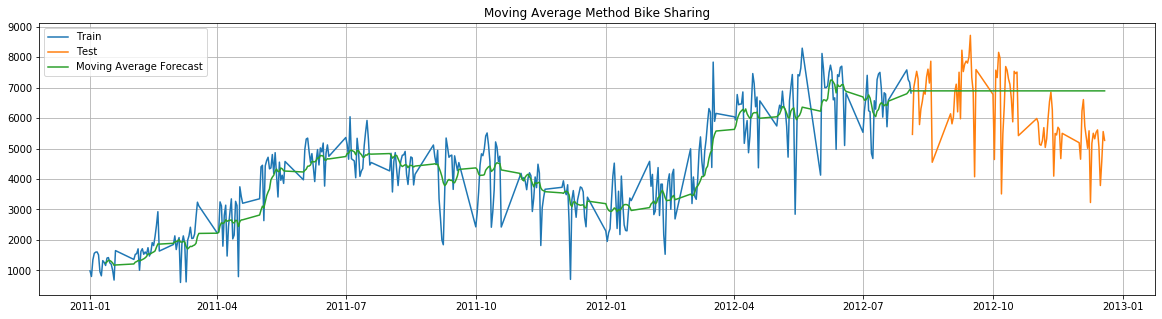

In [37]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['count'], label='Train')    ##set 80% of data as train and forecast the rest 20% of data
plt.plot(test['count'], label='Test')
plt.plot(y['predict'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.title('Moving Average Method Bike Sharing')
plt.show()

# Artifical Sin

In [38]:
sin_df=pd.read_csv("artifical.csv")
sin_df

,date,sin
0,2018-01-01,100.62
1,2018-01-02,102.34
2,2018-01-03,104.06
3,2018-01-04,105.78
4,2018-01-05,107.49
...,...,...
1151,2021-02-25,181.75
1152,2021-02-26,182.73
1153,2021-02-27,183.68
1154,2021-02-28,184.61


In [40]:
sin_df['date'] = pd.to_datetime(sin_df['date'], format='%Y-%m')
sin_df= sin_df.set_index('date')
sin_df.head()

,sin
date,
2018-01-01,100.62
2018-01-02,102.34
2018-01-03,104.06
2018-01-04,105.78
2018-01-05,107.49


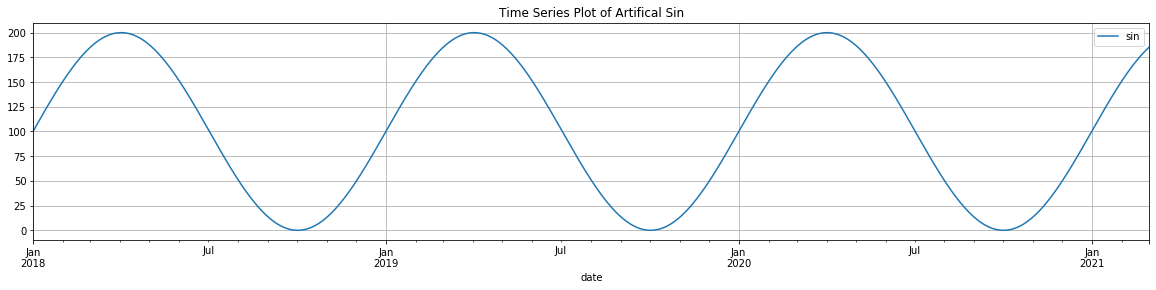

In [41]:
sin_df.plot(figsize=(20,4))
plt.grid()
plt.title('Time Series Plot of Artifical Sin')
plt.show()

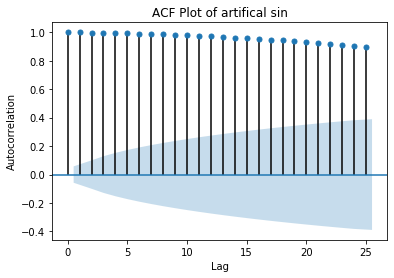

In [43]:
st.plot_acf(sin_df['sin'], lags = 25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of artifical sin')
plt.show()

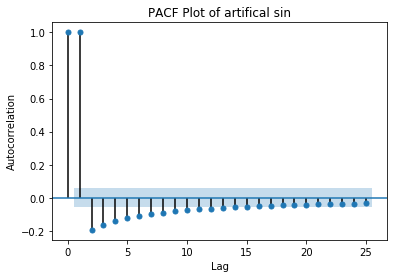

In [44]:
st.plot_pacf(sin_df['sin'], method='ywmle', lags=25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of artifical sin')
plt.show()

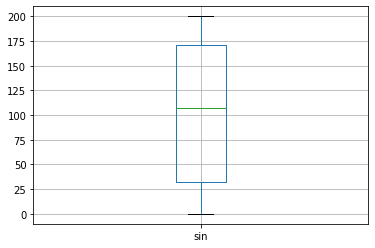

In [45]:
boxplot = sin_df.boxplot(column=['sin'])
boxplot.plot()

plt.show()

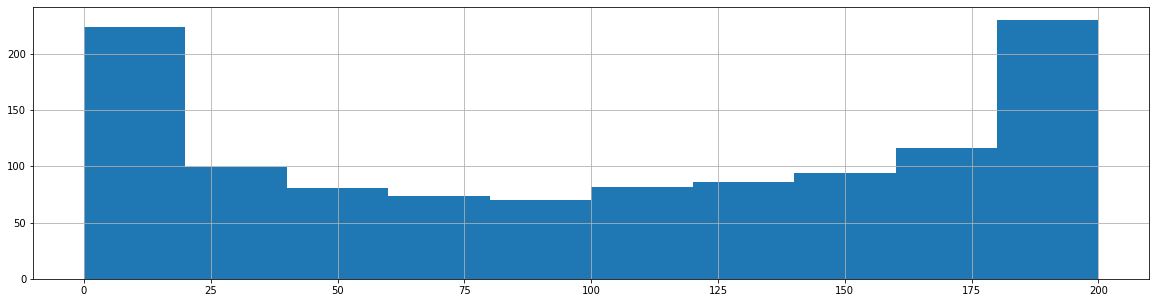

In [46]:
fig = sin_df['sin'].hist(figsize = (20,5))

In [47]:
##MA method

import math

a=len(sin_df)
train_len = math.ceil(0.8*a)
train =sin_df[0:train_len] # first 80% of data months as training set
test = sin_df[train_len:] # last 20% of data
y = sin_df.copy()
ma_window = 12
y['predict'] = sin_df['sin'].rolling(ma_window).mean()   ##calculate the previous mean
y['predict'][train_len:] = y['predict'][train_len-1]  ## +- previous errors' mean

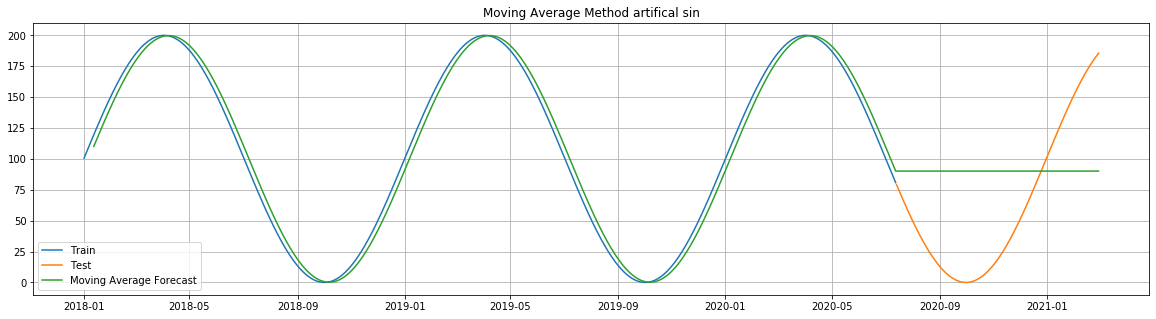

In [48]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['sin'], label='Train')    ##set 80% of data as train and forecast the rest 20% of data
plt.plot(test['sin'], label='Test')
plt.plot(y['predict'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.title('Moving Average Method artifical sin')
plt.show()

# Artifical Cos

In [49]:
cos_df=pd.read_csv("artifical_cosine.csv")
cos_df

,date,cos
0,2018-01-01,200.00
1,2018-01-02,199.97
2,2018-01-03,199.92
3,2018-01-04,199.83
4,2018-01-05,199.72
...,...,...
1151,2021-02-25,157.59
1152,2021-02-26,156.18
1153,2021-02-27,154.75
1154,2021-02-28,153.30


In [50]:
cos_df['date'] = pd.to_datetime(cos_df['date'], format='%Y-%m')
cos_df= cos_df.set_index('date')
cos_df.head()

,cos
date,
2018-01-01,200.00
2018-01-02,199.97
2018-01-03,199.92
2018-01-04,199.83
2018-01-05,199.72


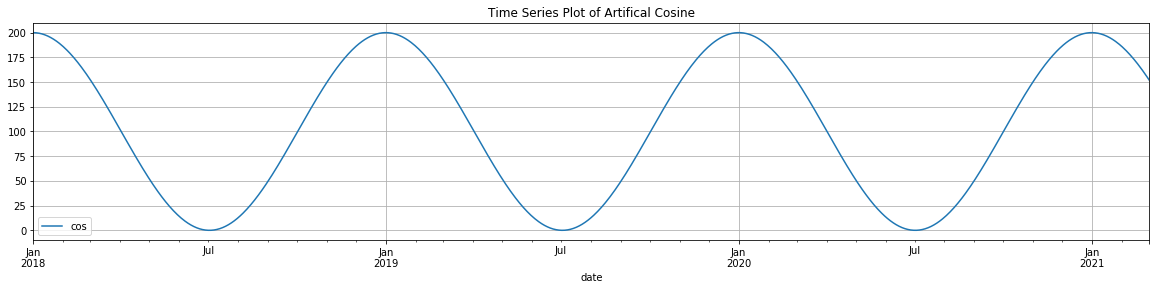

In [51]:
cos_df.plot(figsize=(20,4))
plt.grid()
plt.title('Time Series Plot of Artifical Cosine')
plt.show()

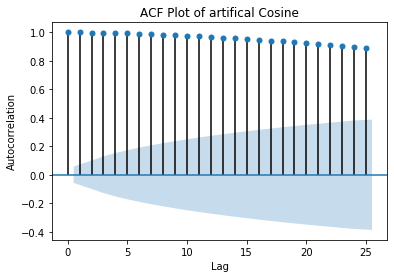

In [52]:
st.plot_acf(cos_df['cos'], lags = 25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of artifical Cosine')
plt.show()

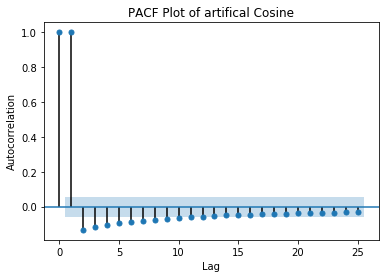

In [53]:
st.plot_pacf(cos_df['cos'], method='ywmle', lags=25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF Plot of artifical Cosine')
plt.show()

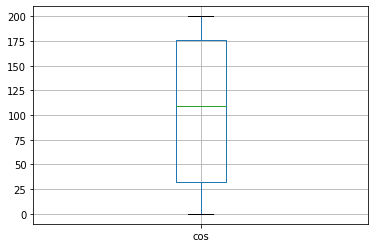

In [54]:
boxplot = cos_df.boxplot(column=['cos'])
boxplot.plot()

plt.show()

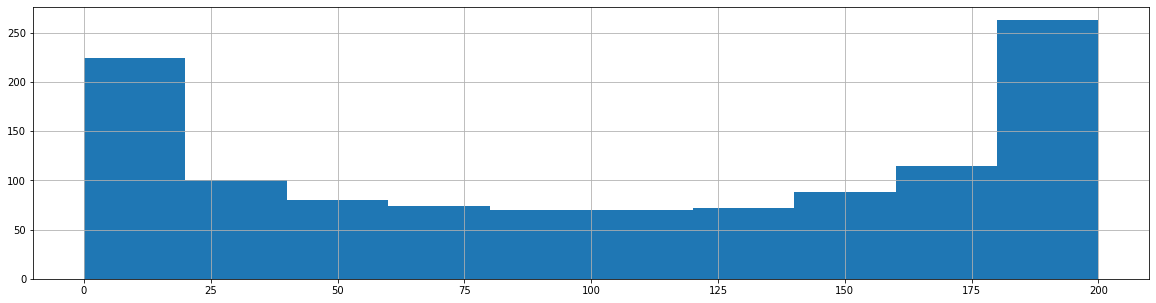

In [55]:
fig = cos_df['cos'].hist(figsize = (20,5))

In [56]:
##MA method

import math

a=len(cos_df)
train_len = math.ceil(0.8*a)
train =cos_df[0:train_len] # first 80% of data months as training set
test = cos_df[train_len:] # last 20% of data
y = cos_df.copy()
ma_window = 12
y['predict'] = cos_df['cos'].rolling(ma_window).mean()   ##calculate the previous mean
y['predict'][train_len:] = y['predict'][train_len-1]  ## +- previous errors' mean

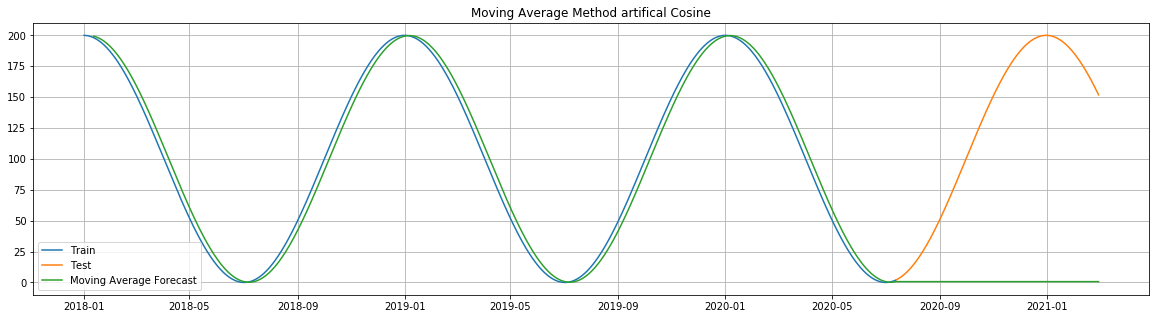

In [57]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['cos'], label='Train')    ##set 80% of data as train and forecast the rest 20% of data
plt.plot(test['cos'], label='Test')
plt.plot(y['predict'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.title('Moving Average Method artifical Cosine')
plt.show()